# Sprint23 LSTM

## 【問題1】各種手法の実行
>Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D \
これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

>サンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [ ]:
# sample data
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

In [4]:
# simple RNN 
'''
LSTM -> simple RNN
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers.recurrent import SimpleRNN
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score) # Test score: 0.6542159204292297
print('Test accuracy:', acc) # Test accuracy: 0.65032

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 46s 2ms/step - loss: 0.6920 - acc: 0.5332 - val_loss: 0.6613 - val_acc: 0.6059
Epoch 2/15
25000/25000 [==============================] - 44s 2ms/step - loss: 0.5714 - acc: 0.7018 - val_loss: 0.5001 - val_acc: 0.7618
Epoch 3/15
25000/25000 [==============================] - 43s 2ms/step - loss: 0.4709 - acc: 0.7848 - val_loss: 0.5960 - val_acc: 0.6763
Epoch 4/15
25000/25000 [==============================] - 43s 2ms/step - loss: 0.4211 - acc: 0.8140 - val_loss: 0.6120 - val_acc: 0.6544
Epoch 5/15
25000/25000 [==============================] - 43s 2ms/step - loss: 0.4165 - acc: 0.8167 - val_loss: 0.5423 - val_acc: 0.7685
Epoch 6/15
25000/25000 [==============================] - 43s 2ms/step - loss: 0.4120 - acc: 0.818

In [6]:
# GRU
'''
LSTM -> GRU
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score) # Test score: 1.2307095554271341
print('Test accuracy:', acc) # Test accuracy: 0.8074

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 125s 5ms/step - loss: 0.4764 - acc: 0.7674 - val_loss: 0.3776 - val_acc: 0.8364
Epoch 2/15
25000/25000 [==============================] - 123s 5ms/step - loss: 0.2915 - acc: 0.8810 - val_loss: 0.3603 - val_acc: 0.8459
Epoch 3/15
25000/25000 [==============================] - 123s 5ms/step - loss: 0.1860 - acc: 0.9290 - val_loss: 0.4204 - val_acc: 0.8385
Epoch 4/15
25000/25000 [==============================] - 123s 5ms/step - loss: 0.1089 - acc: 0.9609 - val_loss: 0.4917 - val_acc: 0.8275
Epoch 5/15
25000/25000 [==============================] - 125s 5ms/step - loss: 0.0663 - acc: 0.9777 - val_loss: 0.6065 - val_acc: 0.8201
Epoch 6/15
25000/25000 [==============================] - 124s 5ms/step - loss: 0.0401 - acc:

In [1]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score) # Test score: 1.1182642282962798
print('Test accuracy:', acc) # Test accuracy: 0.80804

Using TensorFlow backend.


Loading data...
17465344/17464789 [==============================] - 3s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...



Train on 25000 samples, validate on 25000 samples
Epoch 1/15





25000/25000 [==============================] - 165s 7ms/step - loss: 0.4591 - acc: 0.7808 - val_loss: 0.3792 - val_acc: 0.8316
Epoch 2/15
25000/25000 [==============================] - 157s 6ms/step - loss: 0.2977 - acc: 0.8804 - val_loss: 0.4035 - val_acc: 0.8315
Epoch 3/15
25000/25000 [==============================] - 158s 6ms/step - loss: 0.2073 - acc: 0.9183 - val_loss: 0.4419 - val_acc: 0.8340
Epoch 4/15
25000/25000 [==============================] - 158s 6ms/step - loss: 0

In [ ]:
# 双方向にしたい場合はBidirectional
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, simpleRNN, Bidirectional


model.add(Bidirectional(SimpleRNN(NUM_DIM, 
                                  return_sequences=True), 
                        input_shape=(NUM_RNN, 1)))
'''

Train on 950 samples, validate on 50 samples
Epoch 1/150
950/950 [==============================] - 37s 39ms/step - loss: 0.2555 - val_loss: 0.0512
Epoch 2/150
950/950 [==============================] - 32s 34ms/step - loss: 0.0168 - val_loss: 0.0072
Epoch 3/150
950/950 [==============================] - 32s 34ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 4/150
950/950 [==============================] - 32s 34ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 5/150
950/950 [==============================] - 32s 34ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/150
950/950 [==============================] - 32s 34ms/step - loss: 6.7713e-04 - val_loss: 6.7727e-04
Epoch 7/150
950/950 [==============================] - 32s 34ms/step - loss: 4.8753e-04 - val_loss: 4.9528e-04
Epoch 8/150
950/950 [==============================] - 32s 34ms/step - loss: 4.1089e-04 - val_loss: 3.9717e-04
Epoch 9/150
950/950 [==============================] - 32s 34ms/step - loss: 3.5167e-04 - val_loss: 3.5318e

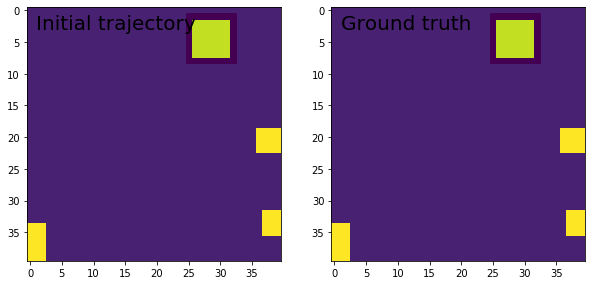

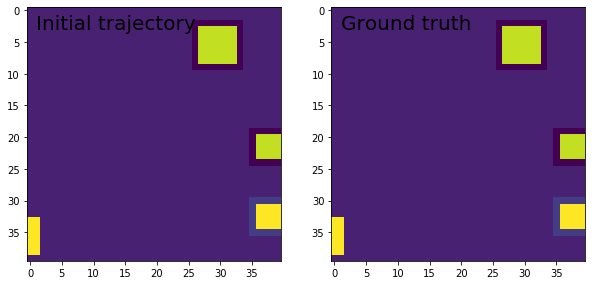

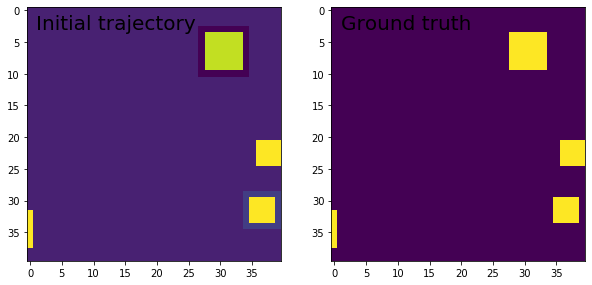

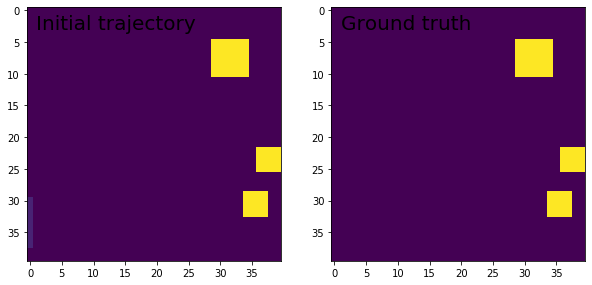

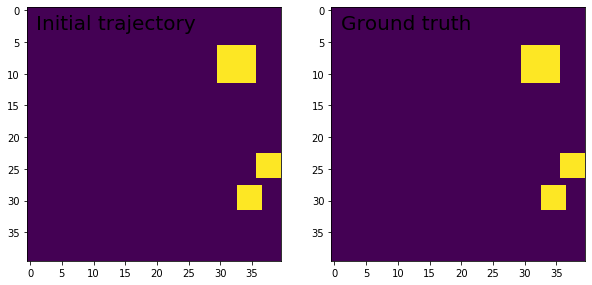

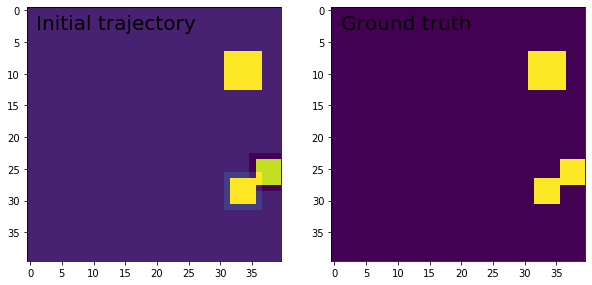

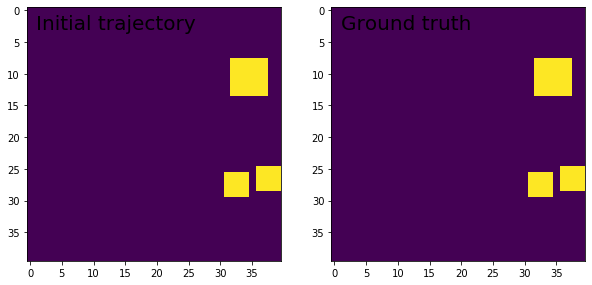

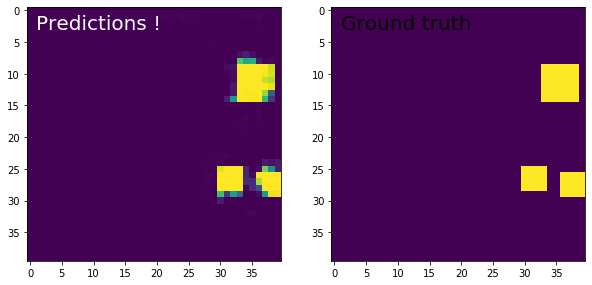

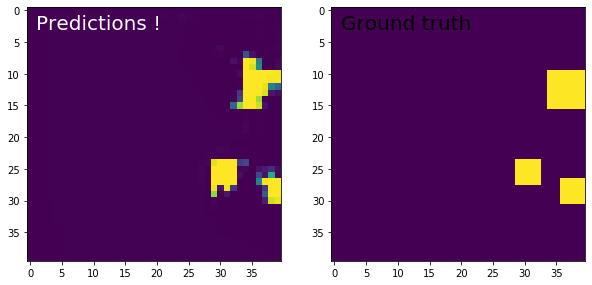

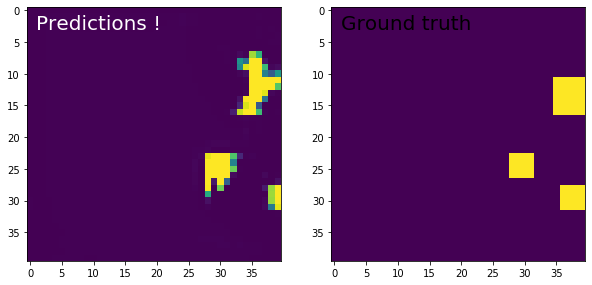

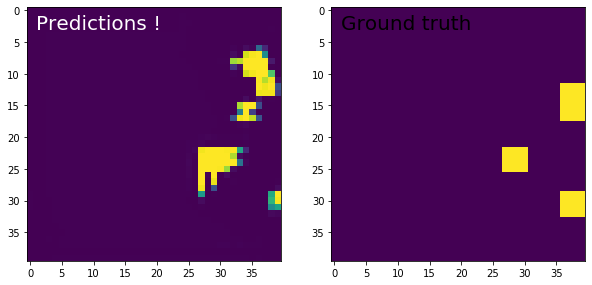

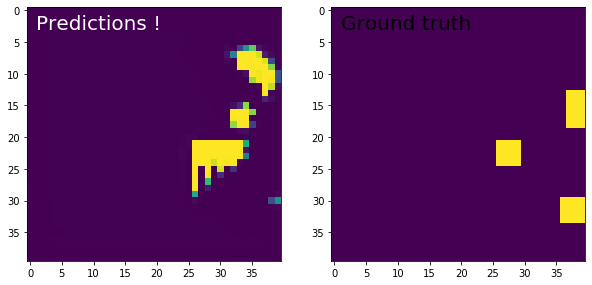

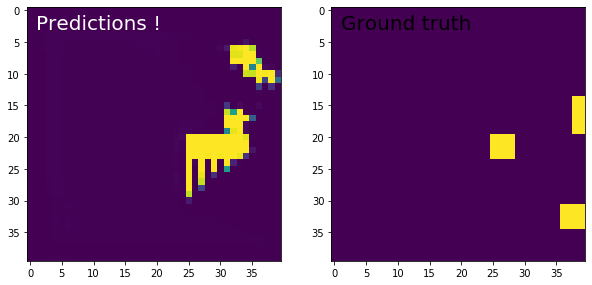

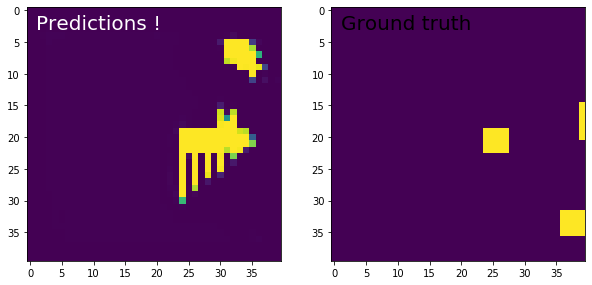

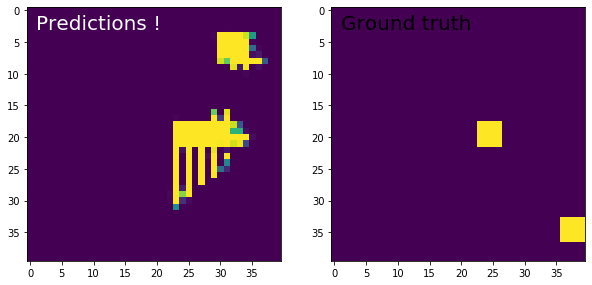

In [3]:
"""
#This script demonstrates the use of a <convolutional LSTM network>.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=150, validation_split=0.05) # default = 300

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# loss: 1.4387e-05 - val_loss: 1.3442e-04

In [ ]:
# 精度の比較
# Simple RNN よりも LSTM, GRU の精度が高かった。

## 【問題2】（アドバンス課題）複数のデータセット間での比較
>Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。



## 【問題3】他のクラスの説明
>ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU(GPU推奨)
- CuDNNLSTM(GPU推奨)